In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Data Analysis on Classification Problem

In [2]:
df = pd.read_csv("train_ctrUa4K.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Simple look at the data

In [3]:
df.describe()
#describe() function would provide count,mean,standard deviation(std),min,quartiles and max in its output for numerical variables in dataset.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()
# here we can see that most of the columns present here are categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7863D1808>,
      dtype=object)

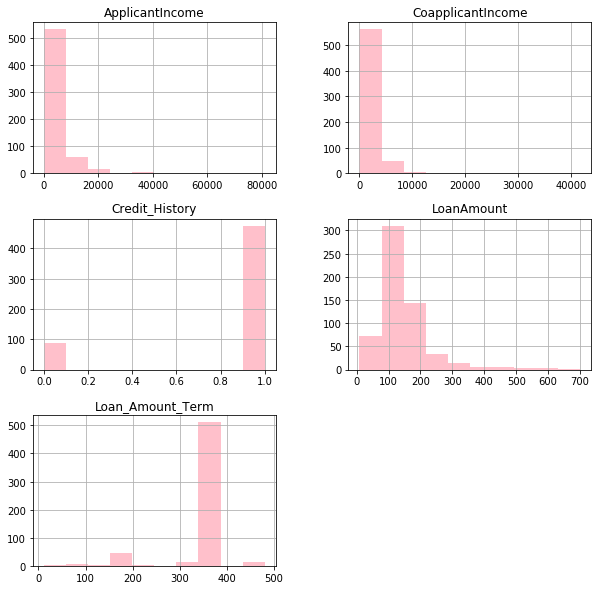

In [5]:
df.hist(figsize=(10,10),color="pink")

In [6]:
# describing the data having column type as objects
df.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001608,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
# In the above block of code we can see that Loan ID is unique for each and every row and hence does not contribute anything in the
# classification problem, therefore we no longer need it to be used in training the model
df.drop(columns=['Loan_ID'],inplace=True)

In [8]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**NOTE:** Always remember that we have to check the relationship between the column to be predicted and all the other columns and check which one has
the most effect and the least effect(or say) in the final classification

In [9]:
# check if we have any duplicate rows in the datast and if we do remove it
df.duplicated().any()

False

## Column wise analysis of the dataset

**We'll start with analysing the categorical columns first**

In [10]:
# Analysing the final column, that we have to predict for the testing values
print(df["Loan_Status"].unique())
print(df["Loan_Status"].value_counts())
print(df["Loan_Status"].isnull().sum())

['Y' 'N']
Y    422
N    192
Name: Loan_Status, dtype: int64
0


In [11]:
# Gender column
print(df["Gender"].value_counts())
print(df["Gender"].isnull().sum())
# in the output we can see that their are 13 NaN values present in the dataset

Male      489
Female    112
Name: Gender, dtype: int64
13


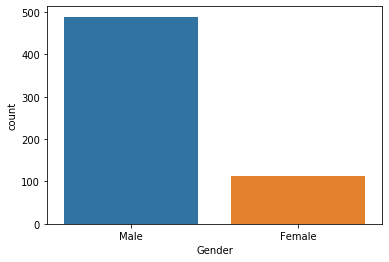

In [12]:
# it clearly states that their are more male members applying for the loans
sns.countplot(df["Gender"])

In [13]:
# hence, in this column we can see clearly that loan_status is not depending on the Gender column
pd.crosstab(df["Gender"],df["Loan_Status"])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


Yes    398
No     213
Name: Married, dtype: int64
3


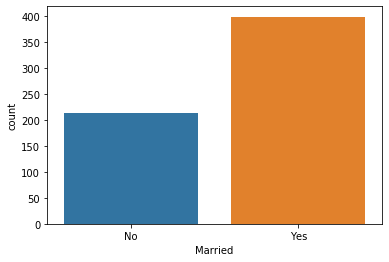

In [14]:
# Married column
print(df["Married"].value_counts())
print(df["Married"].isnull().sum())
sns.countplot(df["Married"])
# from the graph given below we can understand that out of those who have applied for loan are mostly married

In [15]:
# let's check the relation with Loan status column
new = df.groupby(df["Married"]).get_group("Yes")
l = len(new.groupby(df["Loan_Status"]).get_group("Y"))
print("Percentage of people that are married and get loan: ",(l/len(new)*100))
l1 = len(new.groupby(df["Loan_Status"]).get_group("N"))
print("Percentage of people that are married and did not get a loan: ",(l1/len(new)*100))

Percentage of people that are married and get loan:  71.60804020100502
Percentage of people that are married and did not get a loan:  28.391959798994975


In [16]:
new = df.groupby(df["Married"]).get_group("No")
l = len(new.groupby(df["Loan_Status"]).get_group("Y"))
print("Percentage of people that are not married and get loan: ",(l/len(new)*100))
l1 = len(new.groupby(df["Loan_Status"]).get_group("N"))
print("Percentage of people that are not married and did not get a loan: ",(l1/len(new)*100))

Percentage of people that are not married and get loan:  62.91079812206573
Percentage of people that are not married and did not get a loan:  37.08920187793427


In [17]:
# or we can simply do crosstab
pd.crosstab(df["Married"],df["Loan_Status"])
# hence, we can conclude that the ones who are married have more chances of getting a loan than the ones who are not

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
15


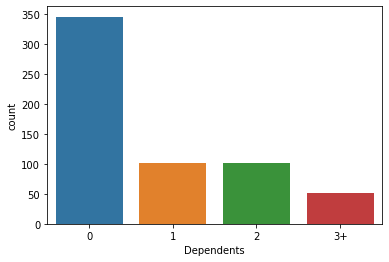

In [18]:
# Dependents column
print(df["Dependents"].value_counts())
print(df["Dependents"].isnull().sum())
# We can see here that the most number of people that have applied have 0 dependents
sns.countplot(df["Dependents"])

In [19]:
pd.crosstab(df["Dependents"],df["Loan_Status"])

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


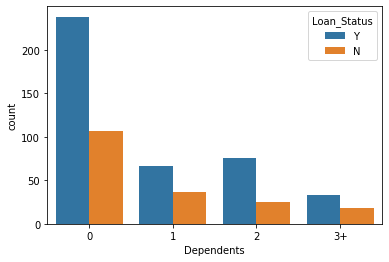

In [20]:
sns.countplot(x="Dependents",hue="Loan_Status",data=df)
# here we can see that people who have applied are mostly the ones that have dependent value=0
# but let's find the percentage for each of the dependents value to get a more clear picture

In [21]:
new = df.groupby(df["Dependents"]).get_group("0")
l = len(new.groupby(df["Loan_Status"]).get_group("Y"))
print("Percentage of people with dependents value 0 getting a loan",(l/len(new)*100))
l1 = len(new.groupby(df["Loan_Status"]).get_group("N"))
print("Percentage of people with dependents value 0 not getting a loan ",(l1/len(new)*100))
print()
new = df.groupby(df["Dependents"]).get_group("1")
l = len(new.groupby(df["Loan_Status"]).get_group("Y"))
print("Percentage of people with dependents value 1 getting a loan",(l/len(new)*100))
l1 = len(new.groupby(df["Loan_Status"]).get_group("N"))
print("Percentage of people with dependents value 1 not getting a loan ",(l1/len(new)*100))
print()
new = df.groupby(df["Dependents"]).get_group("2")
l = len(new.groupby(df["Loan_Status"]).get_group("Y"))
print("Percentage of people with dependents value 2 getting a loan",(l/len(new)*100))
l1 = len(new.groupby(df["Loan_Status"]).get_group("N"))
print("Percentage of people with dependents value 2 not getting a loan ",(l1/len(new)*100))
print()
new = df.groupby(df["Dependents"]).get_group("3+")
l = len(new.groupby(df["Loan_Status"]).get_group("Y"))
print("Percentage of people with dependents value 3+ getting a loan",(l/len(new)*100))
l1 = len(new.groupby(df["Loan_Status"]).get_group("N"))
print("Percentage of people with dependents value 3+ not getting a loan ",(l1/len(new)*100))
# hence, we can conclude that if dependents value is 2 or 0, then one has a higher chance of getting a loan

Percentage of people with dependents value 0 getting a loan 68.98550724637681
Percentage of people with dependents value 0 not getting a loan  31.01449275362319

Percentage of people with dependents value 1 getting a loan 64.70588235294117
Percentage of people with dependents value 1 not getting a loan  35.294117647058826

Percentage of people with dependents value 2 getting a loan 75.24752475247524
Percentage of people with dependents value 2 not getting a loan  24.752475247524753

Percentage of people with dependents value 3+ getting a loan 64.70588235294117
Percentage of people with dependents value 3+ not getting a loan  35.294117647058826


Graduate        480
Not Graduate    134
Name: Education, dtype: int64
0


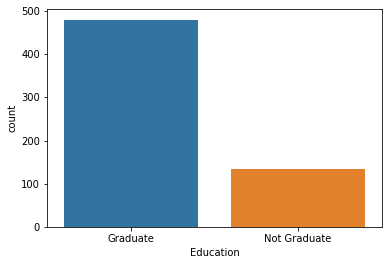

In [22]:
# Education/Graduation column
print(df["Education"].value_counts())
print(df["Education"].isnull().sum())
sns.countplot(df["Education"])
# here, we can see that this column has 0 NaN value present

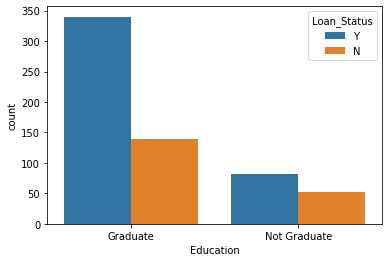

In [23]:
sns.countplot(x="Education",hue="Loan_Status",data=df)
# below, the difference in Loan_Status being yes or no is very large in Graduate and low in Not Graduate
# which means that one has slightly more chance of getting a loan if he/she is graduated
# let's check this by finding out the percentage as well..

In [24]:
n = df.groupby(df["Education"]).get_group("Graduate")
l = len(n.groupby(df["Loan_Status"]).get_group("Y"))
print("Percentage of people that are graduated and recieved loans ",((l/len(n))*100))
l1 = len(n.groupby(df["Loan_Status"]).get_group("N"))
print("Percentage of people that are graduated and did not recieved loans ",((l1/len(n))*100))

Percentage of people that are graduated and recieved loans  70.83333333333334
Percentage of people that are graduated and did not recieved loans  29.166666666666668


In [25]:
n = df.groupby(df["Education"]).get_group("Not Graduate")
l = len(n.groupby(df["Loan_Status"]).get_group("Y"))
print("Percentage of people that are not graduated and recieved loans ",((l/len(n))*100))
l1 = len(n.groupby(df["Loan_Status"]).get_group("N"))
print("Percentage of people that are not graduated and did not recieved loans ",((l1/len(n))*100))

Percentage of people that are not graduated and recieved loans  61.19402985074627
Percentage of people that are not graduated and did not recieved loans  38.80597014925373


In [26]:
pd.crosstab(df["Education"],df["Loan_Status"])
# hence from the analysis we can say that if people who are graduated have more chance of recieving a loan

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [27]:
# for reference
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

No     500
Yes     82
Name: Self_Employed, dtype: int64
32


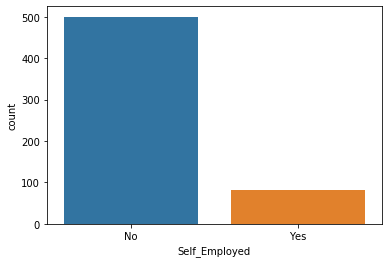

In [28]:
# Self_Employed Column
print(df["Self_Employed"].value_counts())
print(df["Self_Employed"].isnull().sum())
sns.countplot(df["Self_Employed"])

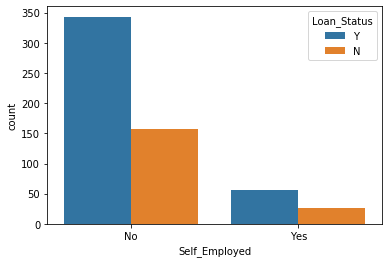

In [29]:
sns.countplot(x="Self_Employed",hue="Loan_Status",data=df)

In [30]:
n = df.groupby(df["Self_Employed"]).get_group("No")
l = len(n.groupby(df["Loan_Status"]).get_group("Y"))
print("Not Self employed but recieved a loan ",((l/len(n))*100))
l1 = len(n.groupby(df["Loan_Status"]).get_group("N"))
print("Not Self emmployed and did not recieve loan",((l1/len(n))*100))
print()
n = df.groupby(df["Self_Employed"]).get_group("Yes")
l = len(n.groupby(df["Loan_Status"]).get_group("Y"))
print("Self employed and recieved a loan ",((l/len(n))*100))
l1 = len(n.groupby(df["Loan_Status"]).get_group("N"))
print("Self emmployed but did not recieve any loan",((l1/len(n))*100))
print()
# hence from this observation we can say that it does not matter much whether you are self employed or not when it comes to get a loan

Not Self employed but recieved a loan  68.60000000000001
Not Self emmployed and did not recieve loan 31.4

Self employed and recieved a loan  68.29268292682927
Self emmployed but did not recieve any loan 31.70731707317073



In [31]:
# Credit_History column
print(df["Credit_History"].value_counts())
print("Total NaN values present in credit history: ",df["Credit_History"].isnull().sum())

1.0    475
0.0     89
Name: Credit_History, dtype: int64
Total NaN values present in credit history:  50


In [32]:
# from the above observations we can see that the column credit history has only null values or 0's and 1's, hence it is a categorical column and not a continuous one
# converting it to object type column

df["Credit_History"] = df["Credit_History"].astype('O')

1.0    475
0.0     89
Name: Credit_History, dtype: int64
50


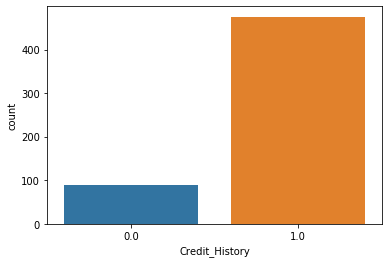

In [33]:
# Credit History
print(df["Credit_History"].value_counts())
print(df["Credit_History"].isnull().sum())
sns.countplot(df["Credit_History"])

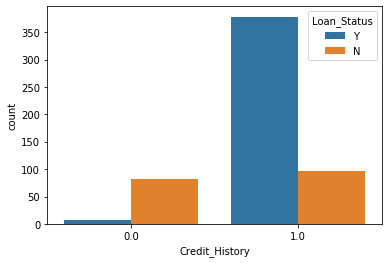

In [34]:
sns.countplot(x="Credit_History",hue="Loan_Status",data=df)
# here, we can clearly see that people with credit_history=1 have very high chances of getting a loan than the ones with Credit_History=0
# this one is a very important features

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
0


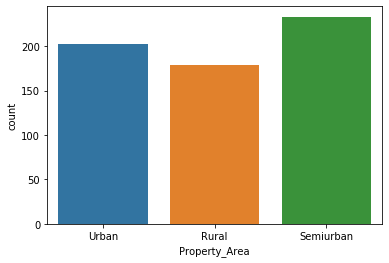

In [35]:
# Property Area Column
print(df["Property_Area"].value_counts())
print(df["Property_Area"].isnull().sum())
sns.countplot(df["Property_Area"])

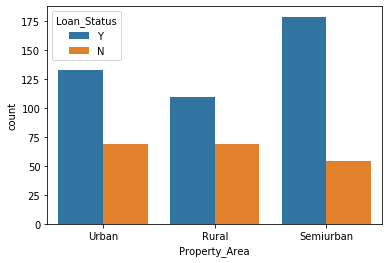

In [36]:
sns.countplot(x="Property_Area",hue="Loan_Status",data=df)

In [37]:
pd.crosstab(df["Property_Area"],df["Loan_Status"])
# this is also an important feature as it shows, if one lives in Semiurban area then they have a better chance or getting a loan

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [38]:
n = df.groupby(df["Property_Area"]).get_group("Urban")
l = len(n.groupby(df["Loan_Status"]).get_group("Y"))
print("Urban Area with Loan percentage ",((l/len(n))*100))
l1 = len(n.groupby(df["Loan_Status"]).get_group("N"))
print("Urban Area without Loan Percentage ",((l1/len(n))*100))
print()
n = df.groupby(df["Property_Area"]).get_group("Rural")
l = len(n.groupby(df["Loan_Status"]).get_group("Y"))
print("Rural Area with Loan percentage ",((l/len(n))*100))
l1 = len(n.groupby(df["Loan_Status"]).get_group("N"))
print("Rural Area without Loan Percentage ",((l1/len(n))*100))
print()
n = df.groupby(df["Property_Area"]).get_group("Semiurban")
l = len(n.groupby(df["Loan_Status"]).get_group("Y"))
print("Semiurban Area with Loan percentage ",((l/len(n))*100))
l1 = len(n.groupby(df["Loan_Status"]).get_group("N"))
print("Semiurban Area without Loan Percentage ",((l1/len(n))*100))
print()
# our assumption above was correct that the ones with Property area = Semiurban have more chances of getting a loan,
# important feature

Urban Area with Loan percentage  65.84158415841584
Urban Area without Loan Percentage  34.15841584158416

Rural Area with Loan percentage  61.452513966480446
Rural Area without Loan Percentage  38.547486033519554

Semiurban Area with Loan percentage  76.82403433476395
Semiurban Area without Loan Percentage  23.17596566523605



In [39]:
# for reference again we'll print df.head
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [46]:
df.describe(include="O")

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
count,601,611,599,614,582,564.0,614
unique,2,2,4,2,2,2.0,3
top,Male,Yes,0,Graduate,No,1.0,Semiurban
freq,489,398,345,480,500,475.0,233


## Analysing the continuous variables

In [40]:
# let's just start by converting the Loan_Status column to values 0's and 1's and then plotting the correlation plot to check
# if they are related or not..
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

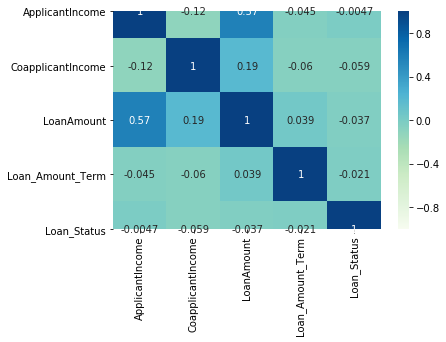

In [41]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap="GnBu")
plt.show()

In [49]:
df.corr().Loan_Status
# we can clearly see here that none of the above mentioned column contributes in measuring the correlation of the final predictive value
# but this might not be the correct answer as of yet, s, stay tuned for tomorrow..

ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [45]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')